# 1. Install Libraries and Define Image Plot function

In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import cv2

In [2]:
import matplotlib.pyplot as plt

def show_image(image):
    # Convert the image to RGB if it's not already in RGB mode
    if image.mode != 'RGB':
        image = image.convert('RGB')

    # Display the image using Matplotlib
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# 2. Upload .txt file



---



In [3]:
# @title ==> 2.1 Upload the txt file

#===============================================================================
# file_path = '/content/iguess.txt'  # Replace with your file path             |
# words = []                                                                   |
# with open(file_path, 'r') as file:                                           |
#     # Read the entire file content                                           |
#     content = file.read()                                                    |
#     # Split the content into words                                           |
#     words = content.replace("\n", "/ ").split()                              |
#===============================================================================

from google.colab import files

# Prompt user to upload a file
uploaded = files.upload()

words = []

# Assuming the uploaded file is a text file, read and store the words in a list
for filename in uploaded.keys():
    with open(filename, 'r') as file:
        content = file.read()
        words = content.replace("\n", "/ ").split()

print(words)

Saving iguess.txt to iguess.txt
['Dollar', 'sign', 'one', 'time/', 'We', 'back/', 'Jab', 'puchhre', 'kaun', 'hai', 'best/', "It's", 'me', 'I', 'guess/', 'Jab', 'puchre', 'opps', 'kyun', 'stress/', "It's", 'me', 'I', 'guess/', '/', 'Ye', 'bolre', 'kya', 'sunai', 'ni', 'dera/', 'Bro', 'mat', 'bol', 'main', 'koi', 'bhai', 'ni', 'tera', '(Haa)/', 'Bola', 'aayega', 'time', 'ni', 'mera/', 'Ab', 'top', 'pe', 'baitha', 'main', 'dikhai', 'ni', 'dera', '(What?)/', 'Main', 'bhai', 'ni', 'tera/', 'I', 'caught', 'a', 'wave,', 'main', 'hi', 'ni', 'kehra', '(No)/', 'Bola', 'aayega', 'time', 'ni', 'mera/', 'Ab', 'maangre', 'hai', 'time,', 'main', 'reply', 'ni', 'dera', '(Haa)/', '/', 'Jab', 'puchre', 'yahan', 'kaun', 'hai', 'best', '(Best)/', "It's", 'me', 'I', 'guess', "(It's", 'me', 'I', 'guess)/', 'Jab', 'puchre', 'opps', 'kyun', 'stress/', "It's", 'me', 'I', 'guess', '(Me', 'I', 'guess)/', '/', 'Jab', 'puchre', 'yahan', 'kaun', 'hai', 'best', '(Best)/', "It's", 'me', 'I', 'guess', "(It's", 'me', '



---



In [4]:
# @title ==> 2.2 Font and Font size
font_path = "/content/Baloo-Regular.ttf"  # Update the path to the font you want to use
font_size = int(input("Enter the font size(ex.: 10, 50):"))  # Update the font size you want to use

Enter the font size(ex.: 10, 50):50




---



---



# 3 Upload portrait image file



---



Saving 339141623_545196074401496_4182175599390961993_n.jpg to 339141623_545196074401496_4182175599390961993_n (1).jpg


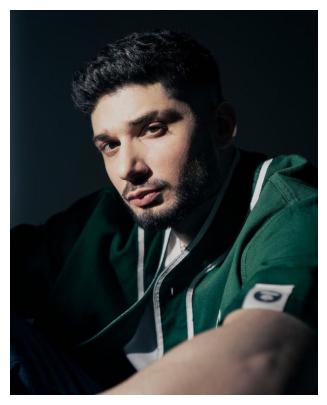

Image Size:  (720, 900)


In [17]:
# @title ==> 3.1 Upoad the Image

from PIL import Image

uploaded = files.upload()

for filename in uploaded.keys():
    background_image_path = filename
    background_image = Image.open(background_image_path)
    background_image = background_image.convert('RGB')

show_image(background_image)
print("Image Size: ", background_image.size)



---



In [24]:
# @title Resize Image
if background_image.size[0] < 2000:
    factor = 2000 / background_image.size[0]
    background_image = background_image.resize((int(background_image.size[0] * factor), int(background_image.size[1] * factor)))

    print("Resized image Size: ", background_image.size)

Resized image Size:  (2000, 2500)




---



---



# 4 Text image generation

In [26]:
# Create a new blank image with the same size as the background image
text_image = Image.new('L', background_image.size, 0)
draw = ImageDraw.Draw(text_image)
font = ImageFont.truetype(font_path, font_size)

In [27]:
# Get image dimensions
width, height = background_image.size

In [28]:
bbox = font.getbbox(words[1])
text_height = bbox[3] - bbox[1]

In [29]:
text_x_position = 0
text_y_position = 0

In [30]:
# Iterate over words in the list

def change_line():
    global text_x_position, text_y_position
    text_x_position = 0
    text_y_position += int(text_height * 1.2)

i = 0

while text_y_position <= height:
    word = words[i]+" "
    filler = ". . . . . . . . ."

    if text_x_position + draw.textlength(word, font=font) <= width:
        draw.text((text_x_position, text_y_position), word, font=font, fill=225)
        text_x_position += draw.textlength(word, font=font)
        i += 1
    else:
        draw.text((text_x_position, text_y_position), filler, font=font, fill=225)
        change_line()
        draw.text((text_x_position, text_y_position), word, font=font, fill=225)
        text_x_position += draw.textlength(word, font=font)
        i += 1
    if i == len(words):
        i = 0



# ---




---



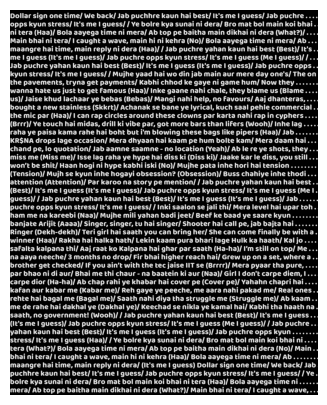

In [31]:
# @title 4.5 Show text image
show_image(text_image)



---



---



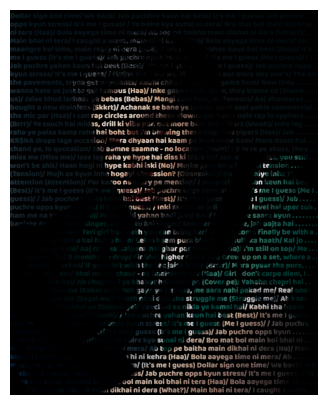

Image saved as 'result_image.png'


In [32]:
# @title 5 Output Image generation
# Convert the text image to a numpy array and create a mask
text_mask = np.array(text_image)

# Load the background image as a numpy array
background_array = np.array(background_image)

# Apply the mask to the background image
result_array = cv2.bitwise_and(background_array, background_array, mask=text_mask)

# Convert the result back to an image
result_image = Image.fromarray(result_array)

# Display the result image (optional)
show_image(result_image)

# Save the result image
result_image.save('/content/result_image.png')
print("Image saved as 'result_image.png'")